<a href="https://colab.research.google.com/github/Rinzler122/AVENGERS/blob/master/Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np

In [87]:
raw_data = pd.read_csv("Index2018.csv")

In [88]:
df = raw_data.copy()

In [23]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [70]:
df.describe()

,Market value
count,8789.000000
mean,1288.624342
std,488.039397
min,438.920000
25%,990.637242
50%,1234.180000
75%,1460.250000
max,2872.867839


In [ ]:
df.isna()

,date,spx,dax,ftse,nikkei
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
6264,False,False,False,False,False
6265,False,False,False,False,False
6266,False,False,False,False,False
6267,False,False,False,False,False


In [ ]:
df.isna().sum() #contar valores NA

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Plotting the Data**

In [74]:
import matplotlib.pyplot as plt

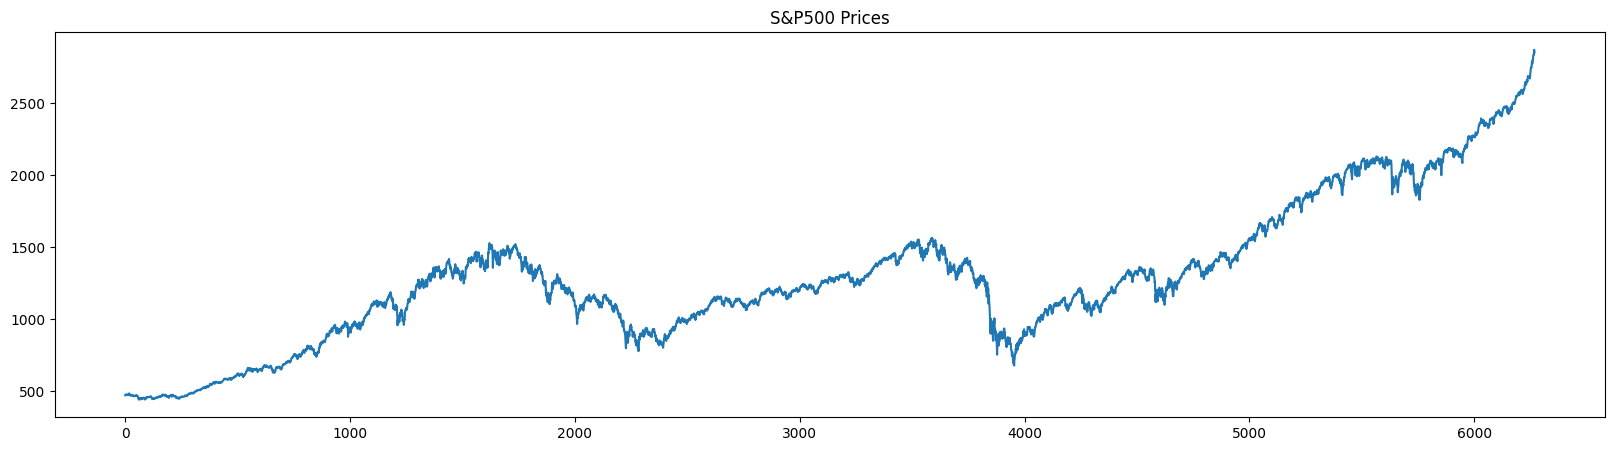

In [56]:
df.spx.plot(figsize=(20,5), title="S&P500 Prices")
plt.show()

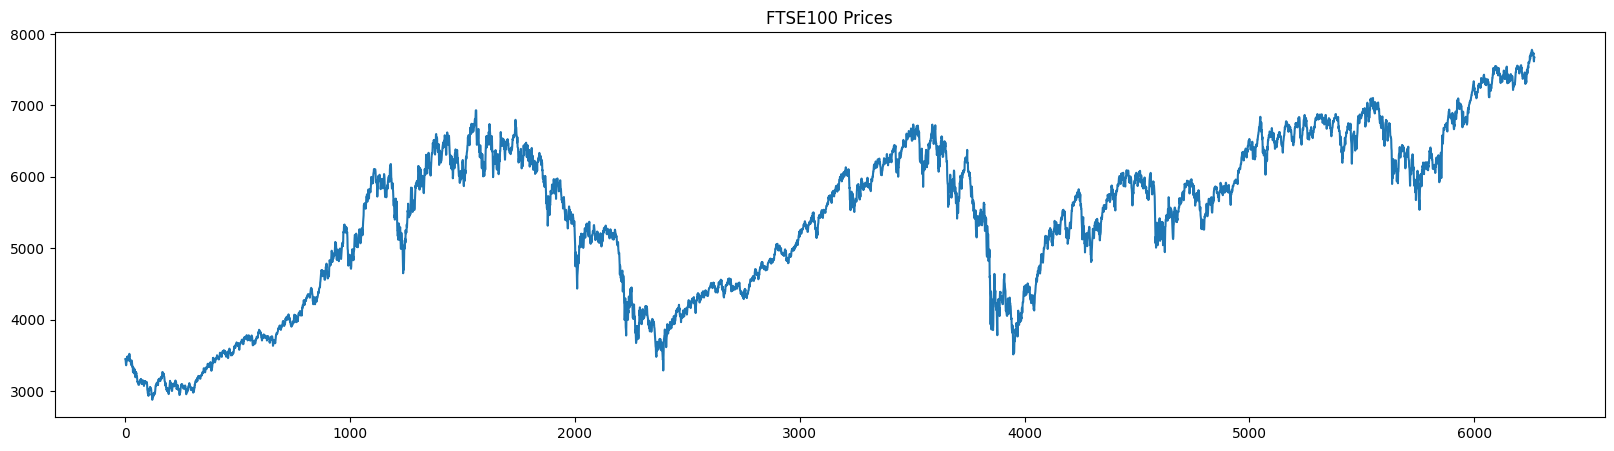

In [ ]:
df.ftse.plot(figsize=(20,5), title="FTSE100 Prices")
plt.show()

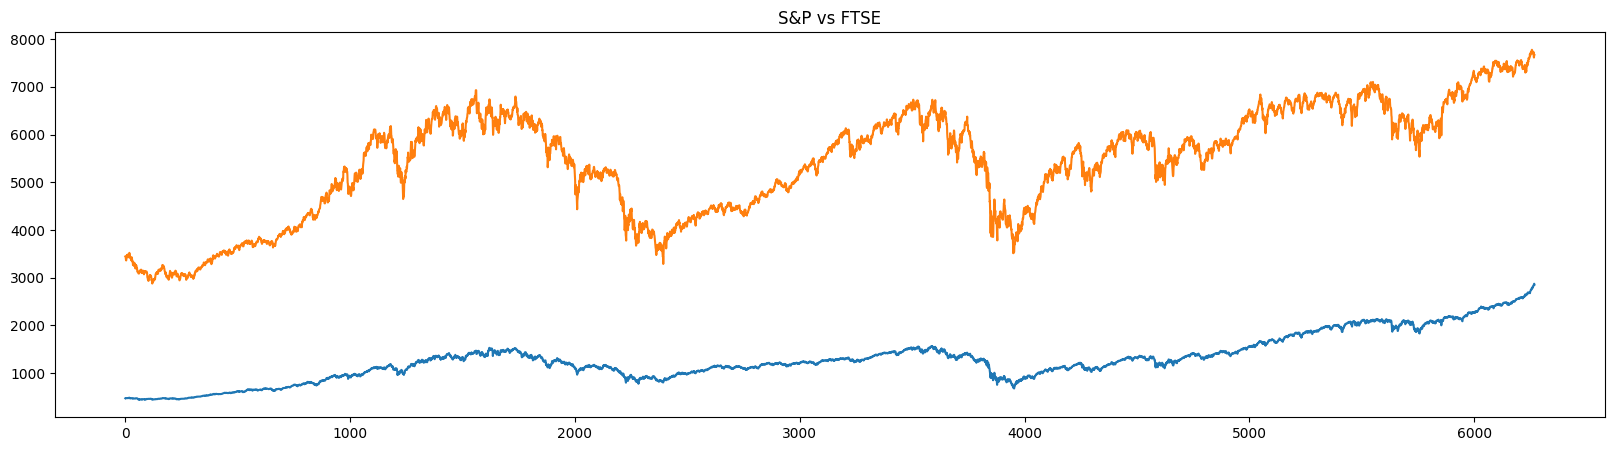

In [ ]:
df.spx.plot(figsize=(20,5), title="S&P500 Prices")
df.ftse.plot(figsize=(20,5), title="FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.show()

**The QQ plot**

In [75]:
import scipy.stats as stats

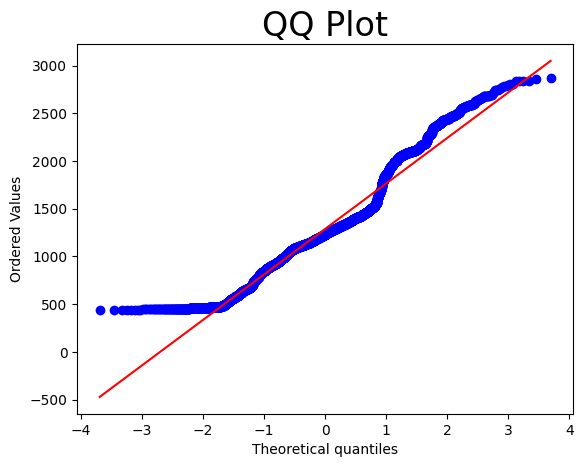

In [76]:
stats.probplot(df.spx, plot = plt)
plt.title ("QQ Plot", size = 24)
plt.show()  # No se distribuyen de forma normal

In [89]:
df.date = pd.to_datetime(df.date, dayfirst = True)

In [78]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [79]:
df.date.describe()

<ipython-input-79-f7d3fa946723>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [90]:
df.set_index("date", inplace=True)

In [81]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [91]:
df = df.asfreq('d')

In [95]:
df = df.asfreq('b')


In [96]:
df.spx = df.spx.fillna(method='ffill')
df.dax = df.dax.fillna(method='bfill')
df.ftse = df.ftse.fillna(method='ffill')
df.nikkei = df.nikkei.fillna(method = "ffill")
# La media no tiene sentido

In [97]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [98]:
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


*Utilizamos unicamente una variable que es la que necesitamos.*


In [99]:
df['Market value'] = df.spx

In [100]:
del df ['dax']
del df ['spx']
del df ['ftse']
del df ['nikkei']

In [101]:
df.describe()

,Market value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Separar la serie en entrenamiento y prueba.

In [103]:
size = int(len(df)*0.8)
size

5021

In [104]:
df_training = df.iloc[:size]

In [105]:
df_training  # Conjunto de entrenamiento

,Market value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [106]:
df_test = df.iloc[size:]

In [107]:
df_test #El de prueba

,Market value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [108]:
df_training.tail()

,Market value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [109]:
df_test.head()

,Market value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
